# Libraries

In [19]:
# General
import pandas as pd
import numpy as np

# Graphing
import matplotlib.pyplot as plt

# Data Import

Functions

In [20]:
def import_smhi(path, skiprows, usecols, rename):
    df = pd.read_csv(
        path,
        skiprows = skiprows, sep = ";", parse_dates = True,
        usecols = usecols
        )
    df.columns = rename
    df["quality_flag"] = df["quality_flag"].str.split(",").str[0] # get rid of "," after some quality flags 
    df["date"] = pd.to_datetime(df["date"]) # Convert to datetimes
    df.dropna(inplace = True) # remove nans where some rows have been left in for some reason.
    return df

def import_fmi(path, skiprows, usecols, rename):
    #converters = {col: convert_dashes for col in usecols}  # Apply convert_dashes to each column in usecols
    df = pd.read_csv(
        path,
        skiprows = skiprows, sep = ",", parse_dates = True,
        usecols = usecols,
    #    converters = converters
    na_values = "-"
        )
    df.columns = rename
    #df["date"] = pd.to_datetime(df[["year", "month", "day"]]) # Convert to datetimes
    return df

Import

In [21]:
# Arctic Atmospheric Indices (NAO and AO)
nao = pd.read_csv("../data/raw/atmosphere/nao/norm.daily.nao.cdas.z500.19500101_current.csv").rename(columns = {"nao_index_cdas": "nao"})
ao = pd.read_csv("../data/raw/atmosphere/ao/norm.daily.ao.cdas.z1000.19500101_current.csv").rename(columns = {"ao_index_cdas": "ao"})

# SMHI - Swedish Meteorological Institute Data for Abisko-Stordalen Palsa Bog
# We"re importing both the manual and automatic station data. Why? The auto station data has lots of data gaps but runs to present day. The manual has less data gaps but stops in about 2022. We"ll merge them in a bit.
# Quality Flag:
# Green (G) = Checked and approved values.
# Yellow (Y) = Suspicious or aggregated values. Roughly checked archival data and unchecked real-time data (last 2 hours).

se_sto_precip_manual = import_smhi(
    path = "../data/raw/climate/abisko-stordalen-palsa-bog/precipitation/smhi-opendata_5_188800_20250418_163156.csv",
    skiprows = 9,
    usecols = ["Representativt dygn", "Nederbördsmängd", "Kvalitet"],
    rename = ["date", "precipitation", "quality_flag"]
)
se_sto_precip_auto = import_smhi(
    path = "../data/raw/climate/abisko-stordalen-palsa-bog/precipitation/smhi-opendata_5_188790_20250418_163211.csv",
    skiprows = 9,
    usecols = ["Representativt dygn", "Nederbördsmängd", "Kvalitet"],
    rename = ["date", "precipitation", "quality_flag"]
)
se_sto_temp_manual = import_smhi(
    path = "../data/raw/climate/abisko-stordalen-palsa-bog/temperature/smhi-opendata_2_188800_20250418_130808.csv",
    skiprows = 9,
    usecols = ["Representativt dygn", "Lufttemperatur", "Kvalitet"],
    rename = ["date", "temperature", "quality_flag"]
)
se_sto_temp_auto = import_smhi(
    path = "../data/raw/climate/abisko-stordalen-palsa-bog/temperature/smhi-opendata_2_188790_20250418_130625.csv",
    skiprows = 9,
    usecols = ["Representativt dygn", "Lufttemperatur", "Kvalitet"],
    rename = ["date", "temperature", "quality_flag"]
)
se_sto_snowdepth_manual = import_smhi(
    path = "../data/raw/climate/abisko-stordalen-palsa-bog/snowdepth/smhi-opendata_8_40_188800_20250418_164039.csv",
    skiprows = 9,
    usecols = ["Datum", "Snödjup", "Kvalitet"],
    rename = ["date", "snowdepth", "quality_flag"]
)
se_sto_snowdepth_auto = import_smhi(
    path = "../data/raw/climate/abisko-stordalen-palsa-bog/snowdepth/smhi-opendata_8_40_188790_20250418_164059.csv",
    skiprows = 11,
    usecols = ["Datum", "Snödjup", "Kvalitet"],
    rename = ["date", "snowdepth", "quality_flag"]
)

# FMI - Finnish Meteorological Institute Data for Kenttarova, Sodankyla, and Varrio
fi_ken_clim = import_fmi(
    path = "../data/raw/climate/kenttarova/Kittilä Kenttärova_ 1.1.1970 - 14.5.2025.csv",
    skiprows = 0,
    usecols = ["Year", "Month", "Day", "Precipitation amount [mm]", "Snow depth [cm]", "Average temperature [°C]"],
    rename = ["year", "month", "day", "precipitation", "snowdepth", "temperature"]
    )
fi_sod_clim = import_fmi(
    path = "../data/raw/climate/sodankyla/Sodankylä Tähtelä_ 1.1.1891 - 14.5.2025.csv",
    skiprows = 0,
    usecols = ["Year", "Month", "Day", "Precipitation amount [mm]", "Snow depth [cm]", "Average temperature [°C]"],
    rename = ["year", "month", "day", "precipitation", "snowdepth", "temperature"]
    )
fi_var_clim = import_fmi(
    path = "../data/raw/climate/varrio/Salla Värriötunturi_ 1.1.1971 - 14.5.2025.csv",
    skiprows = 0,
    usecols = ["Year", "Month", "Day", "Precipitation amount [mm]", "Snow depth [cm]", "Average temperature [°C]"],
    rename = ["year", "month", "day", "precipitation", "snowdepth", "temperature"]
    )

# Pre-processing

Assign Date as Index

In [22]:
def prep_noaa(df):
    df["date"] = pd.to_datetime(df[["year", "month", "day"]]) # Combine into datetime
    df.drop(["year", "month", "day"], axis = 1, inplace = True) # remove these cols as we don"t need them anymore
    df.set_index("date", inplace = True) # make the date the index
    df.rename_axis(None, inplace = True) # Remove the index column header

def prep_smhi(df):
    #df = df.copy()
    df.set_index("date", inplace = True)
    df.rename_axis(None, inplace = True)

def prep_fmi(df):
    df["date"] = pd.to_datetime(df[["year", "month", "day"]]) # Combine into datetime
    df.drop(["year", "month", "day"], axis = 1, inplace = True) # remove these cols as we don"t need them anymore
    df.set_index("date", inplace = True) # make the date the index
    df.rename_axis(None, inplace = True) # Remove the index column header

In [23]:
prep_noaa(nao)
prep_noaa(ao)

prep_smhi(se_sto_precip_manual)
prep_smhi(se_sto_precip_auto)
prep_smhi(se_sto_temp_manual)
prep_smhi(se_sto_temp_auto)
prep_smhi(se_sto_snowdepth_manual)
prep_smhi(se_sto_snowdepth_auto)

prep_fmi(fi_ken_clim)
prep_fmi(fi_sod_clim)
prep_fmi(fi_var_clim)

# Merge

## NOAA Merge

In [24]:
atmos = pd.merge(nao, ao, left_index = True, right_index = True) # This will drop any rows that don"t align

## SMHI Merge

In [25]:
def smhi_merge(manual, automatic):
    
    # Row combine the two dataframes
    combined = pd.concat([manual, automatic], axis = 0)
    
    # Make quality flag category
    combined["quality_flag"] = combined["quality_flag"].astype("category") # Setting column as a special pandas category type as it is either Y or G. This makes pandas go faster
    combined["quality_flag"] = combined["quality_flag"].cat.set_categories(["G", "Y"], ordered = True) # This ensures "G" overwrites "Y" when dropping duplicates
    
    # Sort on index and quality flag column
    # As we made quality flags categorical and ordered, pandas knows to sort quality flags such that G is put before Y.
    combined = combined.rename_axis("date")
    combined_sorted = combined.sort_values(by = [combined.index.name, "quality_flag"])
    
    # Drop duplicates, keeping the first (which is G if it exists)
    final = combined_sorted[~combined_sorted.index.duplicated(keep = "first")]
    
    return final.rename_axis(None)

In [26]:
se_sto_precip = smhi_merge(se_sto_precip_manual, se_sto_precip_auto)
se_sto_temp = smhi_merge(se_sto_temp_manual, se_sto_temp_auto)
se_sto_snowdepth = smhi_merge(se_sto_snowdepth_manual, se_sto_snowdepth_auto)

# Rename quality_flag cols
se_sto_temp = se_sto_temp.rename(columns = {"quality_flag": "quality_flag_temp"})
se_sto_precip = se_sto_precip.rename(columns = {"quality_flag": "quality_flag_precip"})
se_sto_snowdepth = se_sto_snowdepth.rename(columns = {"quality_flag": "quality_flag_snowdepth"})

# Merge
se_sto_clim = pd.concat(
    [se_sto_temp, se_sto_precip, se_sto_snowdepth],
    axis = 1,  # concatenate columns (not rows)
    join = "outer",  # include all dates
)

# Drop Quality Flag Cols
se_sto_clim.drop(["quality_flag_temp", "quality_flag_precip", "quality_flag_snowdepth"], axis = 1, inplace = True)

## FMI Merge
Different variables are taken at different times on the same day. This means our FMI datasets have multiple rows for each day so we merge each row based on date, overwriting any NaNs. 

In [27]:
def fmi_merge(df):
    df["date"] = df.index
    df = df.groupby("date", as_index = False).agg(lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan)
    df.set_index("date", inplace = True) # make the date the index
    df.rename_axis(None, inplace = True)
    return df

In [28]:
fi_ken_clim = fmi_merge(fi_ken_clim)
fi_sod_clim = fmi_merge(fi_sod_clim)
fi_var_clim = fmi_merge(fi_var_clim)

# Cleaning

SMHI
- -9999 is no data value

FMI
- -1 means that there has been no precipitation.
- 0 means that there has been precipitation, but the amount accumulated is not even 0.1 millimetres.
- "-" means that observation data on precipitation is missing completely. For example, this may mean that precipitation is not measured at the station concerned.

In [29]:
# Clean data
def cleaner(df, variable_names, bad_values):
    df[variable_names] = df[variable_names].replace(bad_values, np.nan) # Replace visible/known missing values
    df = df.reindex(pd.date_range(start = df.index[0], end = df.index[-1], freq = "D")) # Reindex to deal with hidden missing values
    return df

In [30]:
atmos = cleaner(atmos, ["nao", "ao"], -9999.0)

se_sto_clim = cleaner(se_sto_clim, ["temperature", "precipitation", "snowdepth"], [-9999.0])
fi_ken_clim = cleaner(fi_ken_clim, ["temperature", "precipitation", "snowdepth"], ["-"])
fi_sod_clim = cleaner(fi_sod_clim, ["temperature", "precipitation", "snowdepth"], ["-"])
fi_var_clim = cleaner(fi_var_clim, ["temperature", "precipitation", "snowdepth"], ["-"])

For the FMI data we need to replace all -1s with 0s in precipitation and snowdepth columns

In [32]:
fi_ken_clim[["precipitation", "snowdepth"]] = fi_ken_clim[["precipitation", "snowdepth"]].replace(-1, 0)
fi_sod_clim[["precipitation", "snowdepth"]] = fi_sod_clim[["precipitation", "snowdepth"]].replace(-1, 0)
fi_var_clim[["precipitation", "snowdepth"]] = fi_var_clim[["precipitation", "snowdepth"]].replace(-1, 0)

Change abisko snowdepth from m to cm

In [33]:
se_sto_clim["snowdepth"] = se_sto_clim["snowdepth"] * 100

# Extra Manual Cleaning

In [35]:
# Remove Pre 1920 Temperature Data from Abisko
#se_sto_clim["temperature"] = se_sto_clim[se_sto_clim.index > pd.Timestamp("1920-01-01")]["temperature"]

# Remove Pre 1957/8 Snow Season Snowdepth Data from Abisko
se_sto_clim["snowdepth"] = se_sto_clim[se_sto_clim.index > pd.Timestamp("1957-06-01")]["snowdepth"]

# Remove Pre 2007 Snow Season Snowdepth Data from Kenttarova
fi_ken_clim["snowdepth"] = fi_ken_clim[fi_ken_clim.index > pd.Timestamp("2006-06-01")]["snowdepth"]

# Remove Pre 1920 Snowdepth Data from Sodankyla
fi_sod_clim["snowdepth"] = fi_sod_clim[fi_sod_clim.index > pd.Timestamp("1919-06-01")]["snowdepth"]

# Interpolation

In [36]:
def interpolate_small_gaps(df, variable, gap_size, interpolation_method):
    
    series = df[variable]

    # Get missing vals
    is_nan = series.isna()

    # group by nan gap
    gap_group = (is_nan != is_nan.shift()).cumsum()
    gap_sizes = is_nan.groupby(gap_group).transform('sum')

    # Make small gap mask
    mask_small_gaps = (gap_sizes <= gap_size) & is_nan

    # Create a series where only small gaps are NaN
    series_temp = series.copy()
    series_temp[~mask_small_gaps & is_nan] = np.nan  # Preserve large gaps
    series_filled = series_temp.interpolate(method = interpolation_method)

    # Assign back into df
    df[variable] = series_filled
    
    return df

In [37]:
# Abisko
# No gaps to fill # se_sto_clim = interpolate_small_gaps(df = fi_ken_clim, variable = "precipitation", gap_size = 5, interpolation_method = "nearest")
# No gaps to fill # se_sto_clim = interpolate_small_gaps(df = fi_ken_clim, variable = "precipitation", gap_size = 5, interpolation_method = "nearest")
se_sto_clim = interpolate_small_gaps(df = se_sto_clim, variable = "snowdepth", gap_size = 5, interpolation_method = "nearest")

# Kenttarova
fi_ken_clim = interpolate_small_gaps(df = fi_ken_clim, variable = "temperature", gap_size = 5, interpolation_method = "pchip")
# Cant interpolate precip # fi_ken_clim = interpolate_small_gaps(df = fi_ken_clim, variable = "precipitation", gap_size = 5, interpolation_method = "nearest")
fi_ken_clim = interpolate_small_gaps(df = fi_ken_clim, variable = "snowdepth", gap_size = 5, interpolation_method = "nearest")

# Sodankyla
fi_sod_clim = interpolate_small_gaps(df = fi_sod_clim, variable = "temperature", gap_size = 5, interpolation_method = "pchip")
# Cant interpolate precip # fi_sod_clim = interpolate_small_gaps(df = fi_sod_clim, variable = "precipitation", gap_size = 5, interpolation_method = "nearest")
fi_sod_clim = interpolate_small_gaps(df = fi_sod_clim, variable = "snowdepth", gap_size = 5, interpolation_method = "nearest")

# Varrio
fi_var_clim = interpolate_small_gaps(df = fi_var_clim, variable = "temperature", gap_size = 5, interpolation_method = "pchip")
# No gaps to fill # fi_var_clim = interpolate_small_gaps(df = fi_var_clim, variable = "precipitation", gap_size = 5, interpolation_method = "nearest")
fi_var_clim = interpolate_small_gaps(df = fi_var_clim, variable = "snowdepth", gap_size = 5, interpolation_method = "nearest")

# Atmos
atmos = interpolate_small_gaps(df = atmos, variable = "ao", gap_size = 5, interpolation_method = "pchip")
atmos = interpolate_small_gaps(df = atmos, variable = "nao", gap_size = 5, interpolation_method = "pchip")

# Preview

In [38]:
scaler = 2
fig_wide = 6.267717 * scaler # width of a4 minus 2.54cm margins either side then x by scaler to scale everything"s size easily
fig_gold = 1.618

Atmospheric Indices

Text(0, 0.5, 'AO Index')

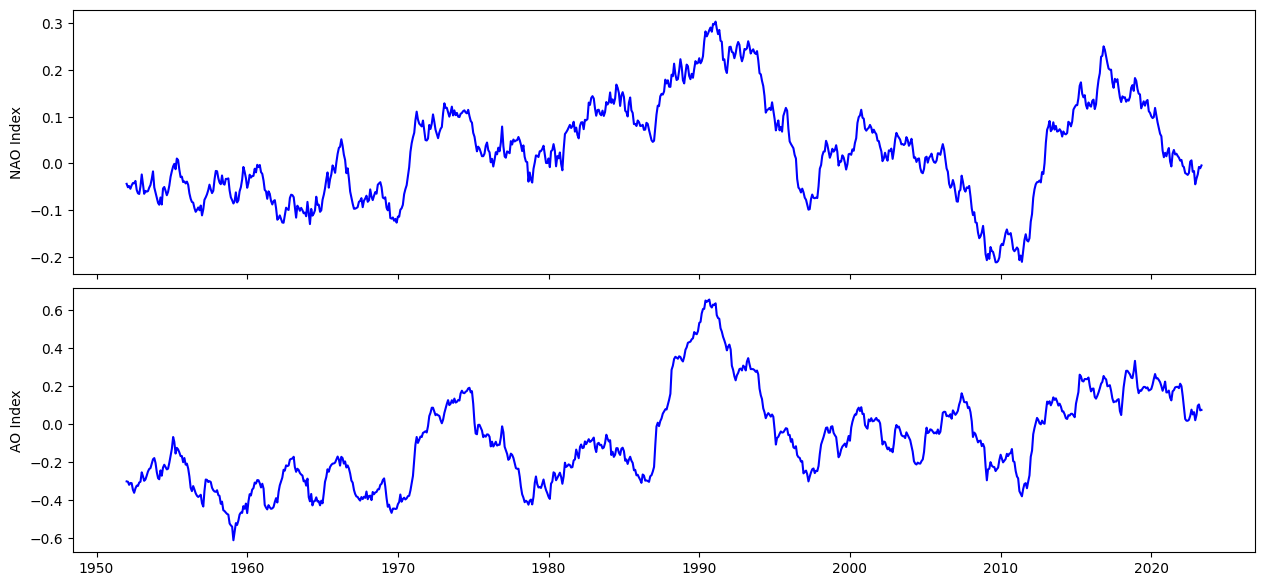

In [39]:
df = atmos.resample("MS").mean().rolling(48, center = True).mean()

nrows = 2
ncols = 1
squish_factor = 2
fig, ax = plt.subplots(
    nrows = nrows, ncols = ncols,
    figsize = (fig_wide, (fig_wide / fig_gold) * ((nrows - 1) / ncols) - squish_factor),
    sharex = True, constrained_layout=True
)
ax = ax.flatten()

sp0 = ax[0].plot(
    df["nao"],
    c = "blue",
)
ax[0].set_ylabel("NAO Index")

sp1 = ax[1].plot(
    df["ao"],
    c = "blue",
)
ax[1].set_ylabel("AO Index")

Climate Variables for Abisko

Text(0, 0.5, 'Daily Snow depth (cmd-1)')

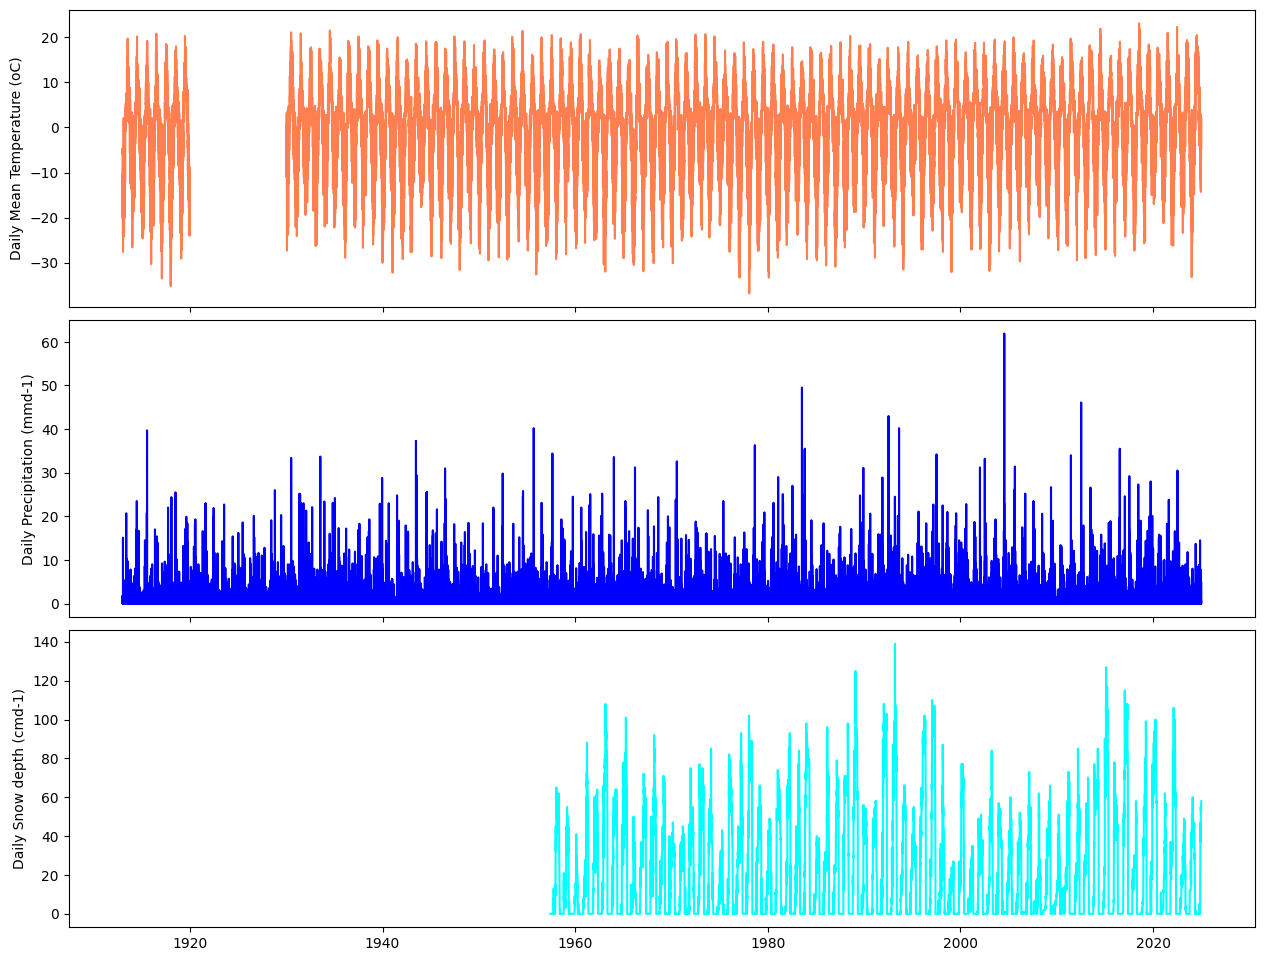

In [40]:
df = se_sto_clim#.resample("MS").mean().rolling(12, center = True, min_periods = 8).mean()

nrows = 3
ncols = 1
squish_factor = 6
fig, ax = plt.subplots(
    nrows = nrows, ncols = ncols,
    figsize = (fig_wide, (fig_wide / fig_gold) * ((nrows - 1) / ncols) - squish_factor),
    sharex = True, constrained_layout = True
)
ax = ax.flatten()

sp0 = ax[0].plot(
    df["temperature"],
    c = "coral",
)
ax[0].set_ylabel("Daily Mean Temperature (oC)")

sp1 = ax[1].plot(
    df["precipitation"],
    c = "blue",
)
ax[1].set_ylabel("Daily Precipitation (mmd-1)")

sp2 = ax[2].plot(
    df["snowdepth"],
    c = "cyan",
)
ax[2].set_ylabel("Daily Snow depth (cmd-1)")

Climate Variables for Kenttarova

Text(0, 0.5, 'Daily Snow depth (cmd-1)')

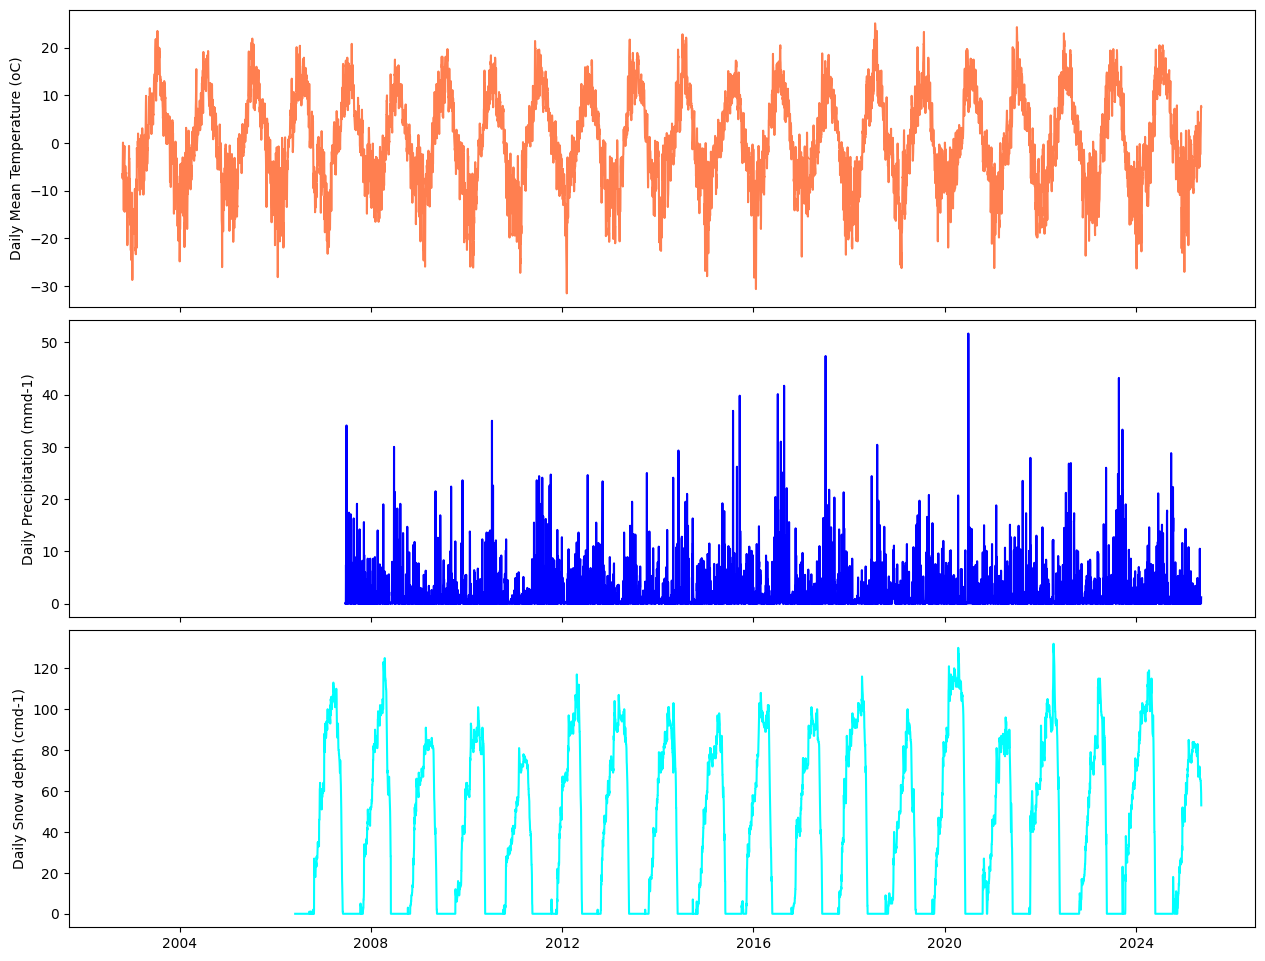

In [41]:
df = fi_ken_clim#.resample("MS").mean().rolling(12, center = True, min_periods = 8).mean()

nrows = 3
ncols = 1
squish_factor = 6
fig, ax = plt.subplots(
    nrows = nrows, ncols = ncols,
    figsize = (fig_wide, (fig_wide / fig_gold) * ((nrows - 1) / ncols) - squish_factor),
    sharex = True, constrained_layout = True
)
ax = ax.flatten()

sp0 = ax[0].plot(
    df["temperature"],
    c = "coral",
)
ax[0].set_ylabel("Daily Mean Temperature (oC)")

sp1 = ax[1].plot(
    df["precipitation"],
    c = "blue",
)
ax[1].set_ylabel("Daily Precipitation (mmd-1)")

sp2 = ax[2].plot(
    df["snowdepth"],
    c = "cyan",
)
ax[2].set_ylabel("Daily Snow depth (cmd-1)")

Climate Variables for Sodankyla

Text(0, 0.5, 'Daily Snow depth (cmd-1)')

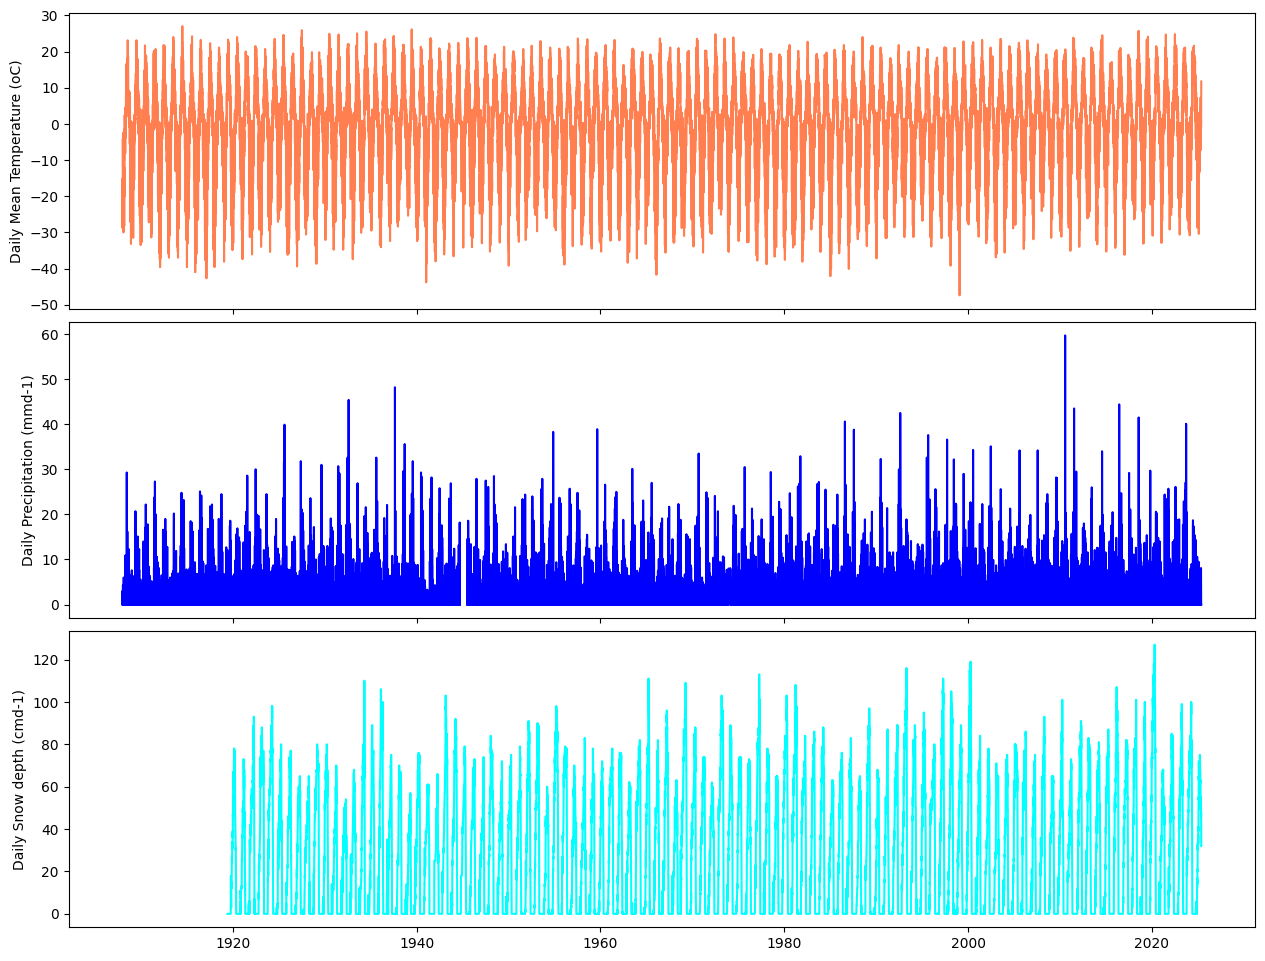

In [42]:
df = fi_sod_clim#.resample("MS").mean().rolling(12, center = True, min_periods = 8).mean()

nrows = 3
ncols = 1
squish_factor = 6
fig, ax = plt.subplots(
    nrows = nrows, ncols = ncols,
    figsize = (fig_wide, (fig_wide / fig_gold) * ((nrows - 1) / ncols) - squish_factor),
    sharex = True, constrained_layout = True
)
ax = ax.flatten()

sp0 = ax[0].plot(
    df["temperature"],
    c = "coral",
)
ax[0].set_ylabel("Daily Mean Temperature (oC)")

sp1 = ax[1].plot(
    df["precipitation"],
    c = "blue",
)
ax[1].set_ylabel("Daily Precipitation (mmd-1)")

sp2 = ax[2].plot(
    df["snowdepth"],
    c = "cyan",
)
ax[2].set_ylabel("Daily Snow depth (cmd-1)")

Climate Variables for Varrio

Text(0, 0.5, 'Daily Snow depth (cmd-1)')

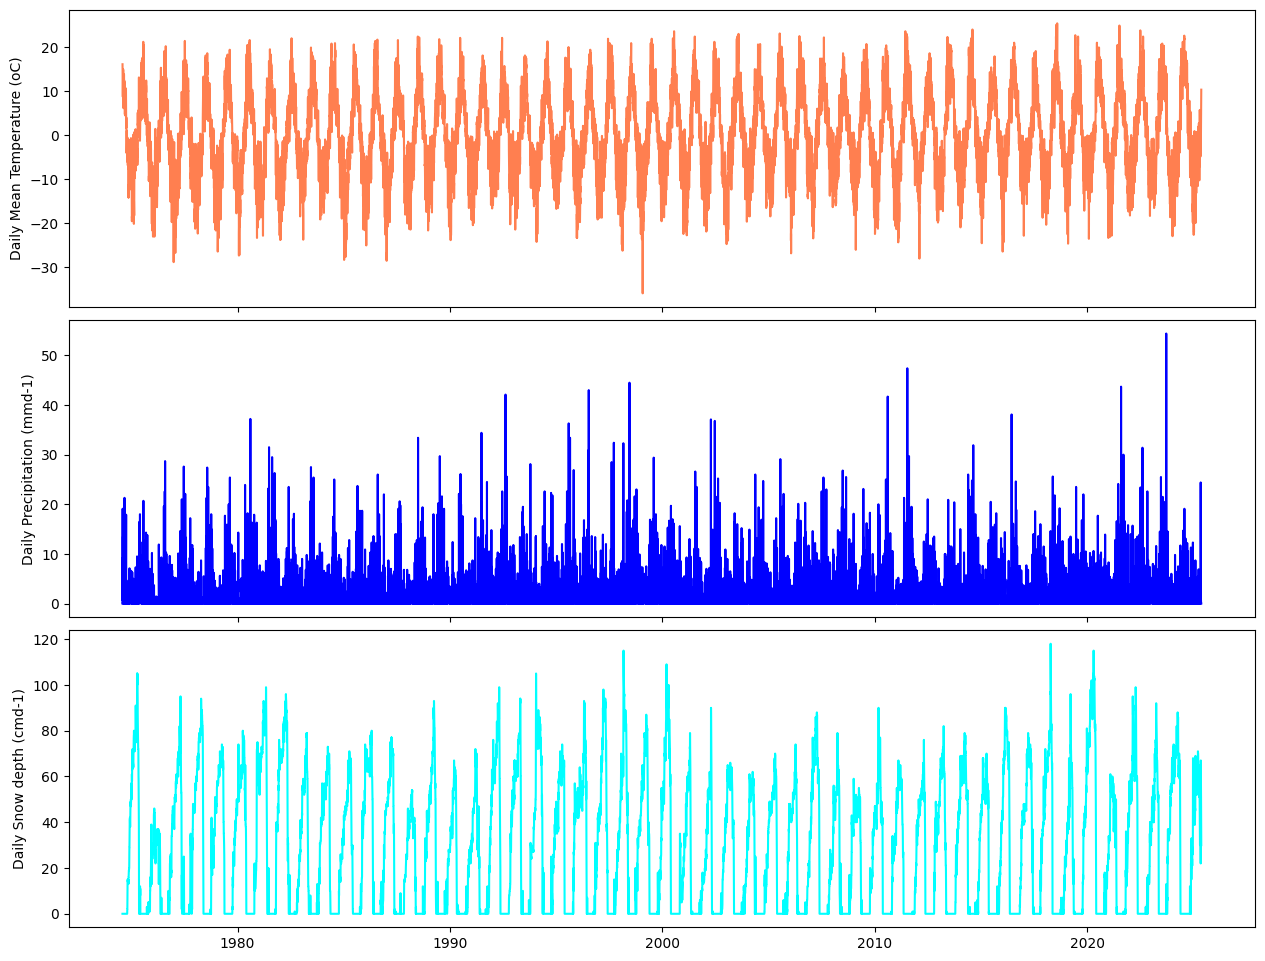

In [43]:
df = fi_var_clim#.resample("MS").mean().rolling(12, center = True, min_periods = 8).mean()

nrows = 3
ncols = 1
squish_factor = 6
fig, ax = plt.subplots(
    nrows = nrows, ncols = ncols,
    figsize = (fig_wide, (fig_wide / fig_gold) * ((nrows - 1) / ncols) - squish_factor),
    sharex = True, constrained_layout = True
)
ax = ax.flatten()

sp0 = ax[0].plot(
    df["temperature"],
    c = "coral",
)
ax[0].set_ylabel("Daily Mean Temperature (oC)")

sp1 = ax[1].plot(
    df["precipitation"],
    c = "blue",
)
ax[1].set_ylabel("Daily Precipitation (mmd-1)")

sp2 = ax[2].plot(
    df["snowdepth"],
    c = "cyan",
)
ax[2].set_ylabel("Daily Snow depth (cmd-1)")

# Export

In [44]:
atmos.to_csv(f"../data/processed/atmos.csv")
se_sto_clim.to_csv(f"../data/processed/se_st1_climate.csv") # using sto for st1 aswell as they are basically the same location give or take ~ 100m
se_sto_clim.to_csv(f"../data/processed/se_sto_climate.csv")
fi_ken_clim.to_csv(f"../data/processed/fi_ken_climate.csv")
fi_sod_clim.to_csv(f"../data/processed/fi_sod_climate.csv")
fi_var_clim.to_csv(f"../data/processed/fi_var_climate.csv")